In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating dataset
# Dataset
data = {
    "id": [1,2,3,4,5,6,7,8,9,10],
    "name": ["Ankit","Riya","Mohit","Neha","Aman","Pooja","Rahul","Simran","Kunal","Sneha"],
    "product": ["Laptop","Mobile","Headphone","Chair","Table","Pen","Notebook","Printer","Sofa","Mouse"],
    "category": ["Electronics","Electronics","Electronics","Furniture","Furniture",
                 "Stationery","Stationery","Electronics","Furniture","Electronics"],
    "quantity": [2,1,3,4,1,20,15,1,1,5],
    "cost": [60000,25000,3000,4000,7000,200,1500,18000,45000,2500]
}
df = pd.DataFrame(data)
df

,id,name,product,category,quantity,cost
0,1,Ankit,Laptop,Electronics,2,60000
1,2,Riya,Mobile,Electronics,1,25000
2,3,Mohit,Headphone,Electronics,3,3000
3,4,Neha,Chair,Furniture,4,4000
4,5,Aman,Table,Furniture,1,7000
5,6,Pooja,Pen,Stationery,20,200
6,7,Rahul,Notebook,Stationery,15,1500
7,8,Simran,Printer,Electronics,1,18000
8,9,Kunal,Sofa,Furniture,1,45000
9,10,Sneha,Mouse,Electronics,5,2500


In [14]:
print(df.head())


   id   name    product     category  quantity   cost
0   1  Ankit     Laptop  Electronics         2  60000
1   2   Riya     Mobile  Electronics         1  25000
2   3  Mohit  Headphone  Electronics         3   3000
3   4   Neha      Chair    Furniture         4   4000
4   5   Aman      Table    Furniture         1   7000


In [9]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        10 non-null     int64 
 1   name      10 non-null     object
 2   product   10 non-null     object
 3   category  10 non-null     object
 4   quantity  10 non-null     int64 
 5   cost      10 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes
None
             id   quantity          cost
count  10.00000  10.000000     10.000000
mean    5.50000   5.300000  16620.000000
std     3.02765   6.684144  20801.431575
min     1.00000   1.000000    200.000000
25%     3.25000   1.000000   2625.000000
50%     5.50000   2.500000   5500.000000
75%     7.75000   4.750000  23250.000000
max    10.00000  20.000000  60000.000000


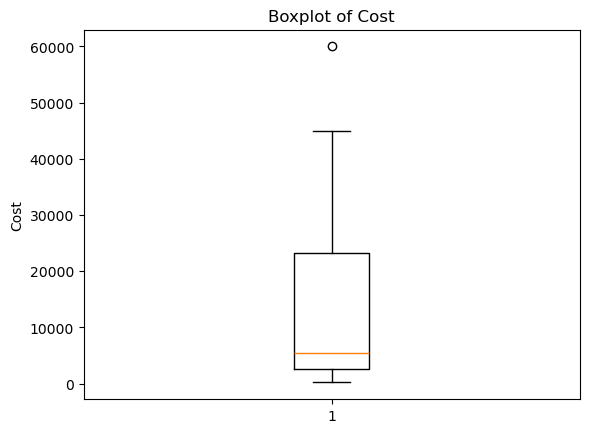

In [19]:
# Boxplot for cost
plt.boxplot(df['cost'])
plt.title("Boxplot of Cost")
plt.ylabel("Cost")
plt.show()



In [17]:
# Calculate Z-score for cost
import numpy as np
df['z_score'] = (df['cost'] - df['cost'].mean()) / df['cost'].std()
outliers = df[np.abs(df['z_score']) > 3]

print("Z-scores:")
print(df[['id', 'cost', 'z_score']])

print("\nOutliers using Z-score method:")
print(outliers)

Z-scores:
   id   cost   z_score
0   1  60000  2.085433
1   2  25000  0.402857
2   3   3000 -0.654763
3   4   4000 -0.606689
4   5   7000 -0.462468
5   6    200 -0.789369
6   7   1500 -0.726873
7   8  18000  0.066342
8   9  45000  1.364329
9  10   2500 -0.678799

Outliers using Z-score method:
Empty DataFrame
Columns: [id, name, product, category, quantity, cost, z_score]
Index: []


In [18]:
Q1 = df['cost'].quantile(0.25)
Q3 = df['cost'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['cost'] < lower_bound) | (df['cost'] > upper_bound)]

print("Outliers based on cost:")
print(outliers)


Outliers based on cost:
   id   name product     category  quantity   cost   z_score
0   1  Ankit  Laptop  Electronics         2  60000  2.085433
